In [1]:
%matplotlib inline

In [2]:
import numpy as np
import nibabel as nb
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.multitest import multipletests

In [4]:
df = pd.read_csv("/home/julia/workspace/mouse_gradients/regions.csv")
df = df.drop(columns=['Unnamed: 0', 'comment'])
df = df.dropna(axis=0)

In [5]:
taus = []
p_values = []
for g in range(6):
    tau, p_value = stats.kendalltau(df['type'],df['gradient %i'%g])
    taus.append(tau)
    p_values.append(p_value)

In [6]:
reject_0, p_corr, _, _ = multipletests(p_values, alpha=0.01, method='fdr_bh')

In [7]:
for g in range(6):
    if reject_0[g] == True:
        print('Gradient %i' %g, 'tau=%f'%taus[g], 'p_corr=%f'%p_corr[g])

Gradient 1 tau=-0.393719 p_corr=0.006184
Gradient 4 tau=-0.356896 p_corr=0.008787


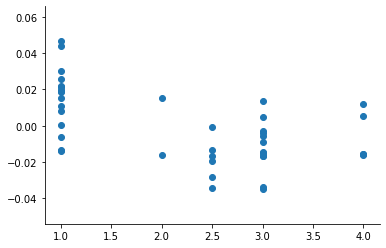

In [30]:
plt.scatter(df['type'],df['gradient 1'])
sns.despine()

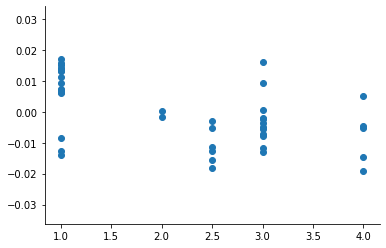

In [31]:
plt.scatter(df['type'], df['gradient 4'])
sns.despine()